## 4.4.7.1　k-means

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [32]:
iris = load_iris()

data = iris.data
target = iris.target

In [33]:
X = data[:100, [0, 2]]

print(X[:5])

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]


今回扱うデータの範囲を、DataFrameで可視化してみる。

In [34]:
X_df = pd.DataFrame(iris.data[:100], columns=iris.feature_names)
X_df['Species'] = iris.target[:100]
X_df = X_df.iloc[:, [0, 2, 4]]

X_df.head()

,sepal length (cm),petal length (cm),Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [35]:
X_df.tail()

,sepal length (cm),petal length (cm),Species
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1
99,5.7,4.1,1


先ほど抽出した列が、新たなデータXの中では0,1番目となる。

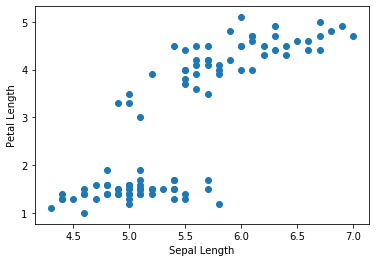

In [36]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')

plt.show()

In [37]:
km = KMeans(n_clusters = 3, init = 'random', n_init= 10, random_state = 123)

y_km = km.fit_predict(X)

In [38]:
print(y_km.shape)
print(y_km)

(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1]


予測ラベルをX_dfに加えて、分かりやすく可視化する。

In [39]:
X_df['y_km'] = y_km

X_df[X_df['y_km'] == 0].head()

,sepal length (cm),petal length (cm),Species,y_km
0,5.1,1.4,0,0
1,4.9,1.4,0,0
2,4.7,1.3,0,0
3,4.6,1.5,0,0
4,5.0,1.4,0,0


In [40]:
X_df[X_df['y_km'] == 1].head()

,sepal length (cm),petal length (cm),Species,y_km
53,5.5,4.0,1,1
55,5.7,4.5,1,1
57,4.9,3.3,1,1
59,5.2,3.9,1,1
60,5.0,3.5,1,1


In [41]:
X_df[X_df['y_km'] == 2].head()

,sepal length (cm),petal length (cm),Species,y_km
50,7.0,4.7,1,2
51,6.4,4.5,1,2
52,6.9,4.9,1,2
54,6.5,4.6,1,2
56,6.3,4.7,1,2


上記のように、y_km = 0, 1, 2 で予測ラベル別に行を絞り、それから特徴量（0：1列目、1：2列名）を指定している。

その後、各予測クラスの中心に✕をプロットする。

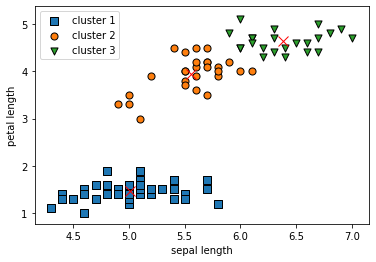

In [42]:
fig, ax = plt.subplots()

ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, edgecolor = 'black', marker = 's', label = 'cluster 1')
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, edgecolor = 'black', marker = 'o', label = 'cluster 2')
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, edgecolor = 'black', marker = 'v', label = 'cluster 3')

ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]), marker ='x', markersize = 10, color = 'red')
ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]), marker = 'x', markersize = 10, color ='red')
ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]), marker = 'x', markersize = 10, color = 'red')

ax.set_xlabel('sepal length')
ax.set_ylabel('petal length')
ax.legend()

plt.show()